# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [86]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [87]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 594


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [88]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =  url + "&q=" + city.replace(" ","+")
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | aasiaat
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | ocher
Processing Record 4 of Set 1 | reyes
Processing Record 5 of Set 1 | atherton
Processing Record 6 of Set 1 | dakhla
Processing Record 7 of Set 1 | severo-yeniseyskiy
Processing Record 8 of Set 1 | susuman
Processing Record 9 of Set 1 | kodiak
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | papatowai
Processing Record 12 of Set 1 | dong ha
Processing Record 13 of Set 1 | codrington
Processing Record 14 of Set 1 | puerto natales
Processing Record 15 of Set 1 | grytviken
Processing Record 16 of Set 1 | dauphin
Processing Record 17 of Set 1 | ta'izz
Processing Record 18 of Set 1 | waitangi
Processing Record 19 of Set 1 | tabor
Processing Record 20 of Set 1 | port mathurin
Processing Record 21 of Set 1 | figuig (centre)
Processing Record 22 of Set 1 | raduzhnyy
Processing Record 23 of Set 1 | do

In [89]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
dtype: int64

In [90]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country
0,aasiaat,68.7098,-52.8699,30.54,80,56,7.36,GL
1,jamestown,42.0970,-79.2353,71.02,91,100,8.05,US
2,ocher,57.8904,54.7202,50.81,89,100,8.39,RU
3,reyes,-14.3167,-67.3833,63.66,69,100,4.32,BO
4,atherton,53.5237,-2.4935,57.74,78,100,3.00,GB


In [91]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [92]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country
City_ID,,,,,,,,
0,aasiaat,68.7098,-52.8699,30.54,80,56,7.36,GL
1,jamestown,42.0970,-79.2353,71.02,91,100,8.05,US
2,ocher,57.8904,54.7202,50.81,89,100,8.39,RU
3,reyes,-14.3167,-67.3833,63.66,69,100,4.32,BO
4,atherton,53.5237,-2.4935,57.74,78,100,3.00,GB


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

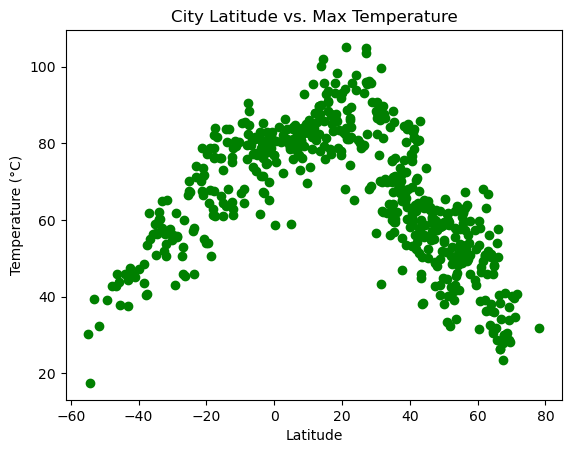

In [93]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],facecolors="green")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (°C)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

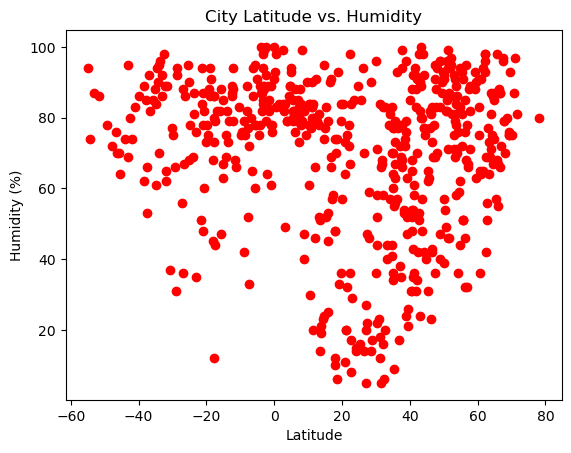

In [94]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],facecolors="red")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

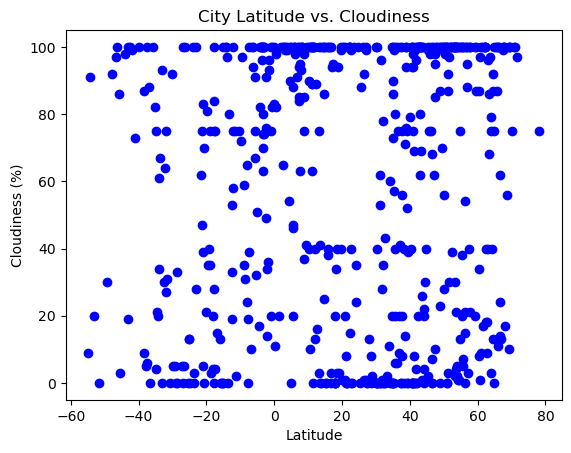

In [95]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],facecolors="blue")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

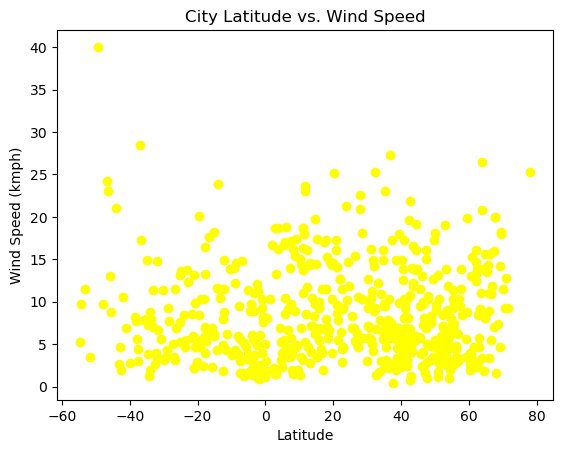

In [96]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],facecolors="yellow")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (kmph)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [97]:
# Define a function to create Linear Regression plots
def linear_regression_plots(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, 'r-')
    plt.annotate(line_eq, text_coordinates, fontsize=15, color='red')
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-squared value is: {rvalue**2}")
    print(f"The r value is: {rvalue}")
    plt.show()

In [98]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]).astype(float) > 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country
City_ID,,,,,,,,
0,aasiaat,68.7098,-52.8699,30.54,80,56,7.36,GL
1,jamestown,42.0970,-79.2353,71.02,91,100,8.05,US
2,ocher,57.8904,54.7202,50.81,89,100,8.39,RU
4,atherton,53.5237,-2.4935,57.74,78,100,3.00,GB
5,dakhla,23.6848,-15.9580,65.14,85,100,21.27,EH


In [99]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]).astype(float) < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country
City_ID,,,,,,,,
3,reyes,-14.3167,-67.3833,63.66,69,100,4.32,BO
10,papatowai,-46.5619,169.4708,42.89,76,97,24.18,NZ
12,codrington,-38.2667,141.9667,43.68,89,9,7.67,AU
13,puerto natales,-51.7236,-72.4875,32.45,86,0,3.44,CL
14,grytviken,-54.2811,-36.5092,17.53,74,91,9.73,GS


###  Temperature vs. Latitude Linear Regression Plot

The r-squared value is: 0.6525095702234361
The r value is: -0.8077806448680459


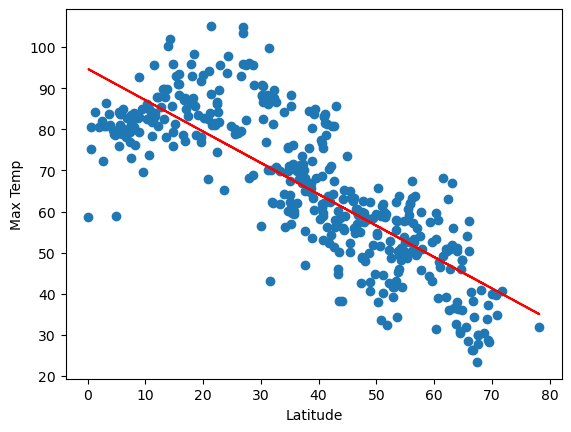

<Figure size 640x480 with 0 Axes>

In [100]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df["Max Temp"]
linear_regression_plots(x_values, y_values, "Max Temp", (6, -10))
# Save the figure
plt.savefig("output_data/Fig5.png")

The r-squared value is: 0.7257604640109927
The r value is: 0.851915761100235


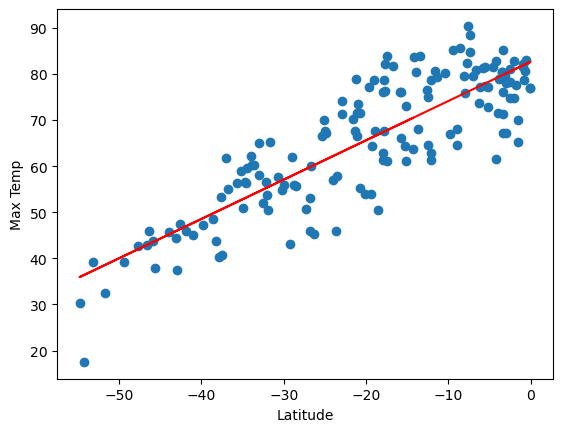

<Figure size 640x480 with 0 Axes>

In [101]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df["Max Temp"]
linear_regression_plots(x_values, y_values, "Max Temp", (6, -10))
# Save the figure
plt.savefig("output_data/Fig6.png")

**Discussion about the linear relationship:** After analyzing these specific plots, we can infer that temperature and latitude have a correlation. In particular, the northern hemisphere has a r-value of -0.7952768701902554 which is statistically significant. The southern hemisphere also has a high 0.8748035990044993. This shows that in the northern hemisphere, the further north a city is, the lower the maximum temperature will be. The opposite goes for the southern hemisphere, with maximum temperature showing a decrease the further south the city's location is. In general, the further a city is from the equator, the lower the maximum temperature.

### Humidity vs. Latitude Linear Regression Plot

The r-squared value is: 0.01641348744540304
The r value is: 0.12811513355339033


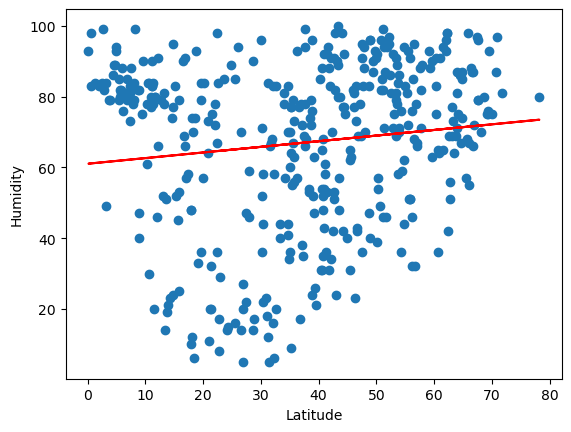

<Figure size 640x480 with 0 Axes>

In [102]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df["Humidity"]
linear_regression_plots(x_values, y_values, "Humidity", (6, -10))
# Save the figure
plt.savefig("output_data/Fig7.png")

The r-squared value is: 0.00741827346421292
The r value is: 0.08612939953472867


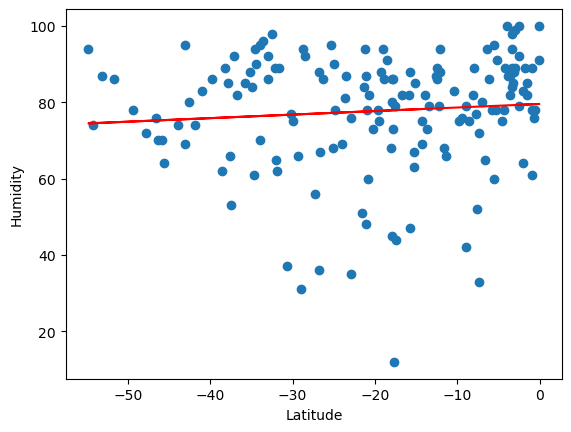

<Figure size 640x480 with 0 Axes>

In [103]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df["Humidity"]
linear_regression_plots(x_values, y_values, "Humidity", (6, -10))
# Save the figure
plt.savefig("output_data/Fig8.png")

**Discussion about the linear relationship:** In this section, we discuss latitude vs humidity for the cities listed in this project. For the northern hemisphere data, we can see that the r-value is 0.12811513355339033, which is a weak correlation. For the southern hemisphere the r-value is 0.08612939953472867, which is also a weak correlation. After analyzing this data, one can infer that there is little correlation between latitude and humidity. In particular, the time of day and proximity to evaporating water (water vapor) is more indicative of a location's humidity

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared value is: 0.00015688667120831935
The r value is: 0.012525440958637718


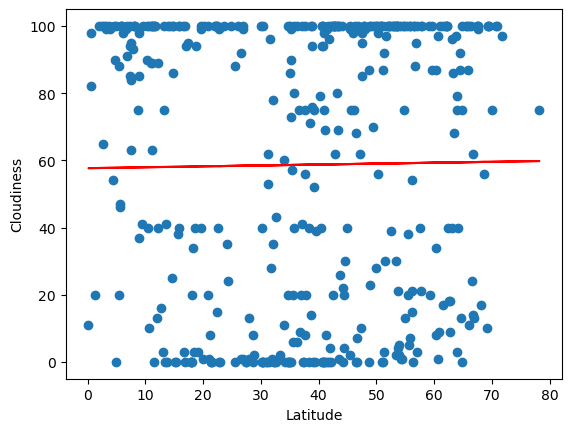

<Figure size 640x480 with 0 Axes>

In [104]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df["Cloudiness"]
linear_regression_plots(x_values, y_values, "Cloudiness", (6, -10))
# Save the figure
plt.savefig("output_data/Fig9.png")

The r-squared value is: 0.03378827206790494
The r value is: 0.18381586457078436


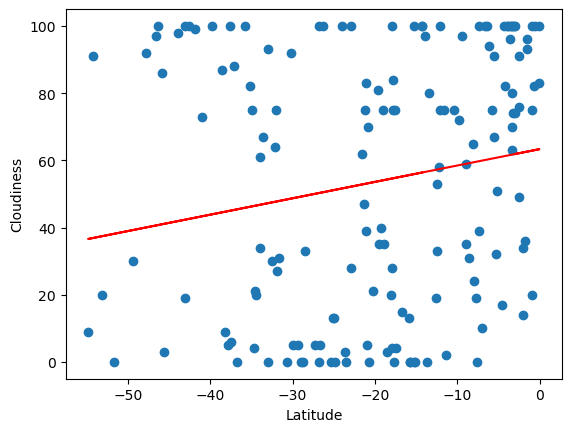

<Figure size 640x480 with 0 Axes>

In [105]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df["Cloudiness"]
linear_regression_plots(x_values, y_values, "Cloudiness", (6, -10))
# Save the figure
plt.savefig("output_data/Fig10.png")

**Discussion about the linear relationship:** In the case of cloudiness, the northern hemisphere has an r-value of 0.012525440958637718, and the southern hemisphere has an r-value of 0.18381586457078436. Both of these r-values indicate that there is very little correlation between latitude and cloudiness. This indicates that the latitude has little correlation with cloudiness. In similar fashion to the previous question, variables such as time of day/seasons, as well as proximity to water vapor is more strongly correlated to cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared value is: 0.002789290494425996
The r value is: -0.052813733956481396


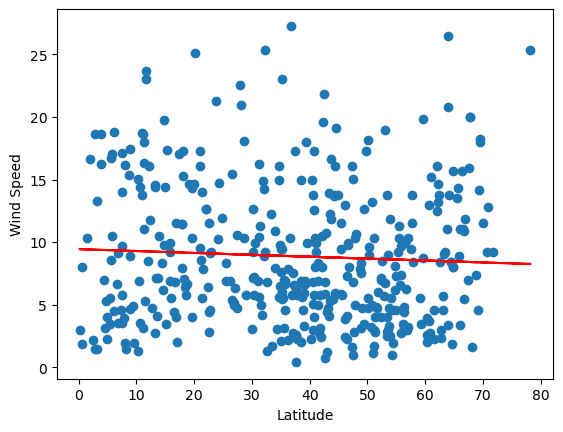

<Figure size 640x480 with 0 Axes>

In [106]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df["Wind Speed"]
linear_regression_plots(x_values, y_values, "Wind Speed", (6, -10))
# Save the figure
plt.savefig("output_data/Fig11.png")

The r-squared value is: 0.07325736186960423
The r value is: -0.2706609721951139


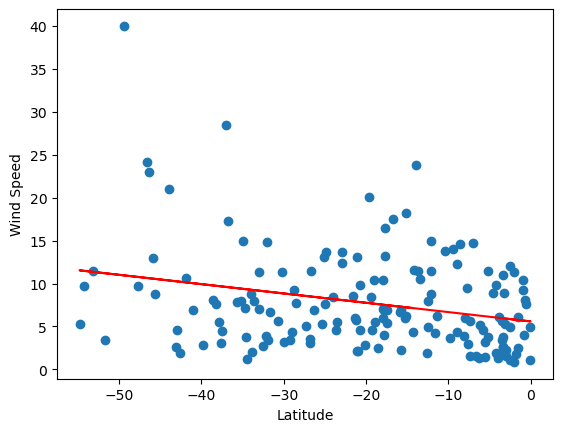

<Figure size 640x480 with 0 Axes>

In [107]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df["Wind Speed"]
linear_regression_plots(x_values, y_values, "Wind Speed", (6, -10))
# Save the figure
plt.savefig("output_data/Fig12.png")

**Discussion about the linear relationship:** For the northern hemisphere, the r-value is -0.052813733956481396, whereas in the southern hemisphere, the r-value is -0.2706609721951139. Although neither of these are particularly significant when it comes to correlation between wind speed and latitude, we can see that in the southern hemisphere there is a larger correlation, however this is very slight. Geographic features (or lack thereof) tend to have a more significant correlation to wind speed.